<a href="https://colab.research.google.com/github/rohanpagadala/FMML_Projects_and-_Labs/blob/main/AIML_project_2_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Project

---

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

we wil be performing a simple Exploratory Data Anaysis for this project. We will use the methods we learned in the tutorials to have a basic understanding of the dataset. So first we will start with the heart dataset available from kaggle. the infomration about the columns of the dataset is given below:    
-age    
-sex    
-chest pain type (4 values)    
-resting blood pressure    
-serum cholestoral in mg/dl    
-fasting blood sugar > 120 mg/dl    
-resting electrocardiographic results (values 0,1,2)    
-maximum heart rate achieved    
-exercise induced angina   
-oldpeak = ST depression induced by exercise relative to rest    
-the slope of the peak exercise ST segment    
-number of major vessels (0-3) colored by flourosopy    
-:thal: 0 = normal; 1 = fixed defect; 2 = reversable defect    

Fill in the portions that says "to do"

In [2]:
from google.colab import files
uploaded1 = files.upload()

Saving heart.csv to heart.csv


In [3]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.shape

(303, 14)

In [5]:
data.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Data preparation

In [6]:
## we will be comparing rest of the parameters/columns present in the data with respect to precence or absece of heart disease
data['target'] = data.target.replace({1: "Disease", 0: "No_disease"})
data['sex'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp'] = data.cp.replace({1: "typical_angina",
                          2: "atypical_angina",
                          3:"non-anginal pain",
                          4: "asymtomatic"})
data['exang'] = data.exang.replace({1: "Yes", 0: "No"})
data['slope'] = data.cp.replace({1: "upsloping",
                          2: "flat",
                          3:"downsloping"})
data['thal'] = data.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [7]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,non-anginal pain,145,233,1,0,150,No,2.3,non-anginal pain,0,fixed_defect,Disease
1,37,Male,atypical_angina,130,250,0,1,187,No,3.5,atypical_angina,0,reversable_defect,Disease
2,41,Female,typical_angina,130,204,0,0,172,No,1.4,typical_angina,0,reversable_defect,Disease
3,56,Male,typical_angina,120,236,0,1,178,No,0.8,typical_angina,0,reversable_defect,Disease
4,57,Female,0,120,354,0,1,163,Yes,0.6,0,0,reversable_defect,Disease


First, lets look at the difference in the number of samples with and without disease using a barplot.

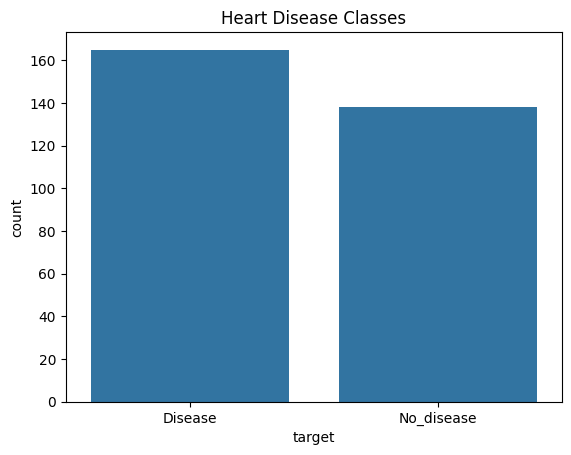

In [8]:
sns.barplot(data['target'].value_counts())
plt.title('Heart Disease Classes')
plt.show()

Text(0.5, 1.0, 'Heart Disease Classes')

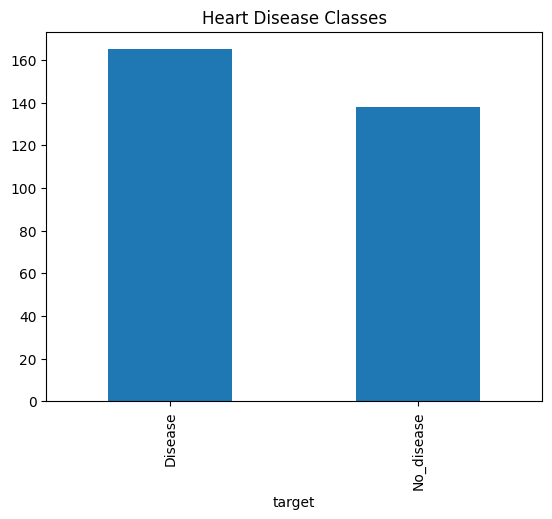

In [9]:
## we can plot the same barplots usng the pandas inbuilt plotting functions.
data['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

<ipython-input-59-dea9363a6d83>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='coolwarm')


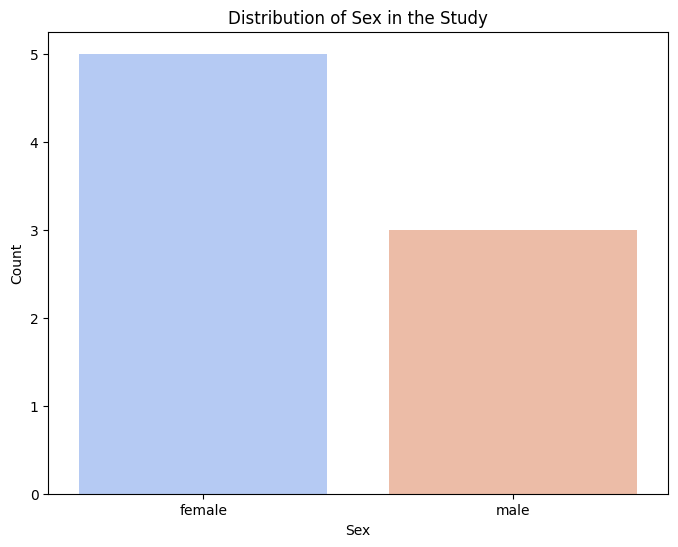

In [59]:
## Now plot a barplot indicating the the sex of the participants involved in the study, use whatever method of ploting comfortable for you
## to do
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
data = {'sex': ['female', 'male', 'female', 'male', 'female', 'male', 'female', 'female']}
df = pd.DataFrame(data)

# Plotting a barplot for the 'sex' feature
plt.figure(figsize=(8,6))
sns.countplot(x='sex', data=df, palette='coolwarm')
plt.title('Distribution of Sex in the Study')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

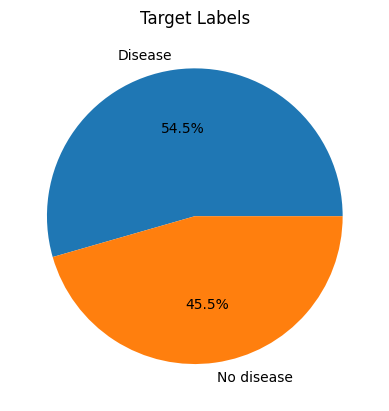

In [10]:
## pie charts can also be used to show the same infomation in a different manner
plt.pie(data['target'].value_counts(), labels=["Disease", "No disease"], autopct='%1.1f%%')
plt.title('Target Labels')
plt.show()

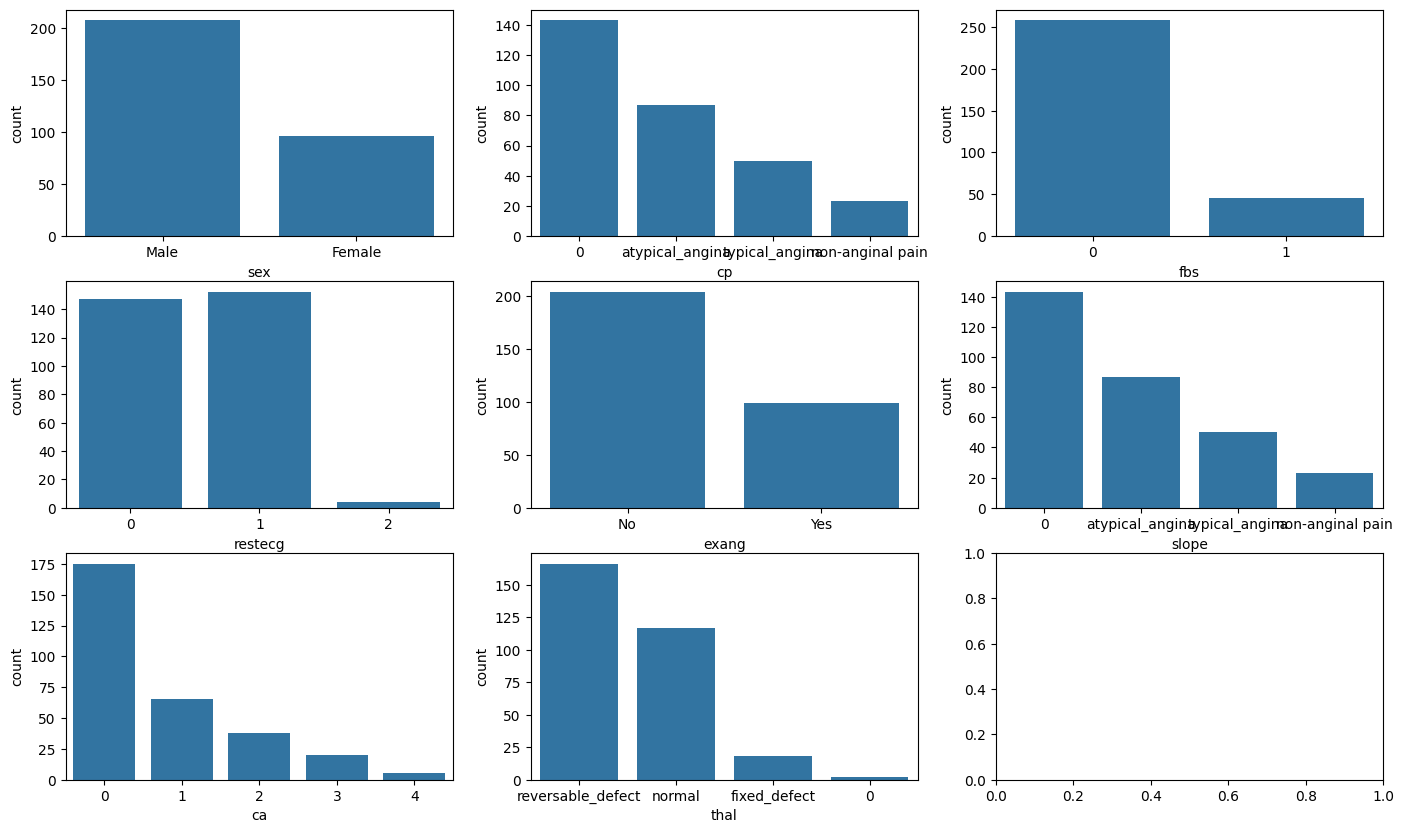

In [11]:
# next we will plot the counts of all the non-continous features present in the dataset.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.barplot(data[feature].value_counts(), ax=ax)

Text(0.5, 1.0, 'Disease classes according to Chest Pain')

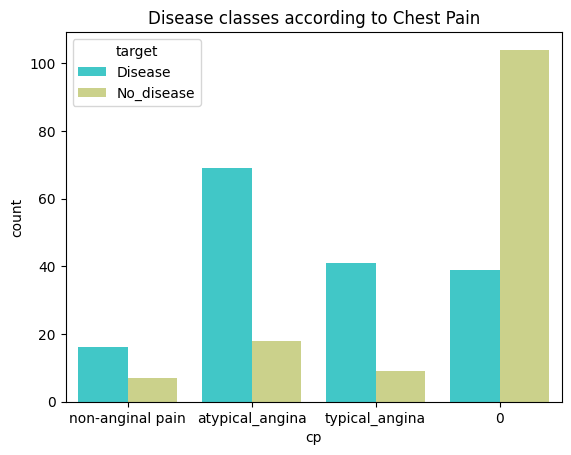

In [12]:
##  now lets play with 2 vaiables in dataset. Lets see if chest pain translates to the presence of desease in most cases...
sns.countplot(x='cp', hue='target', data=data, palette='rainbow').set_title('Disease classes according to Chest Pain')

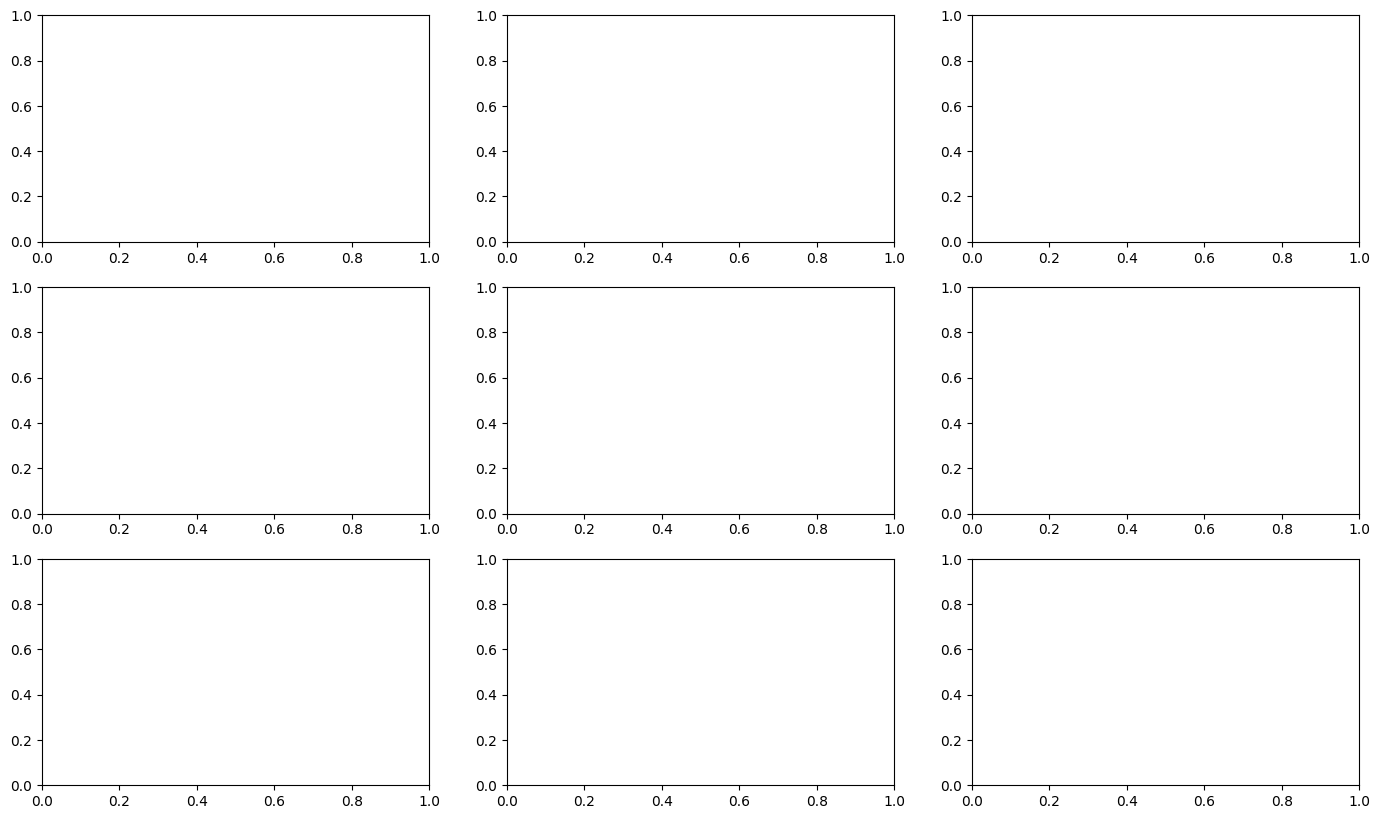

In [13]:
# now lets visualise count of all vairables w.r.t the presence of disease togather:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    ## to do


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


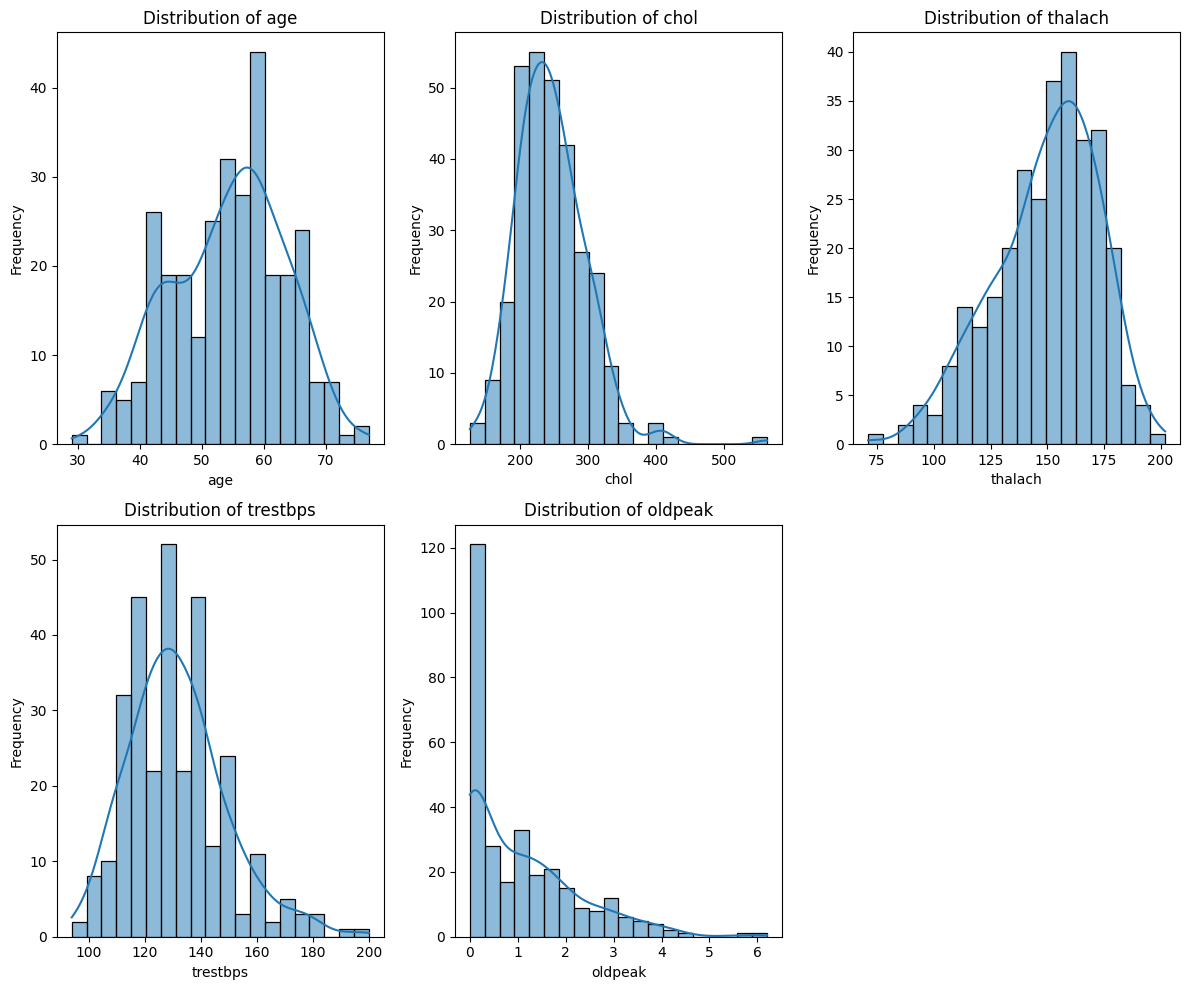

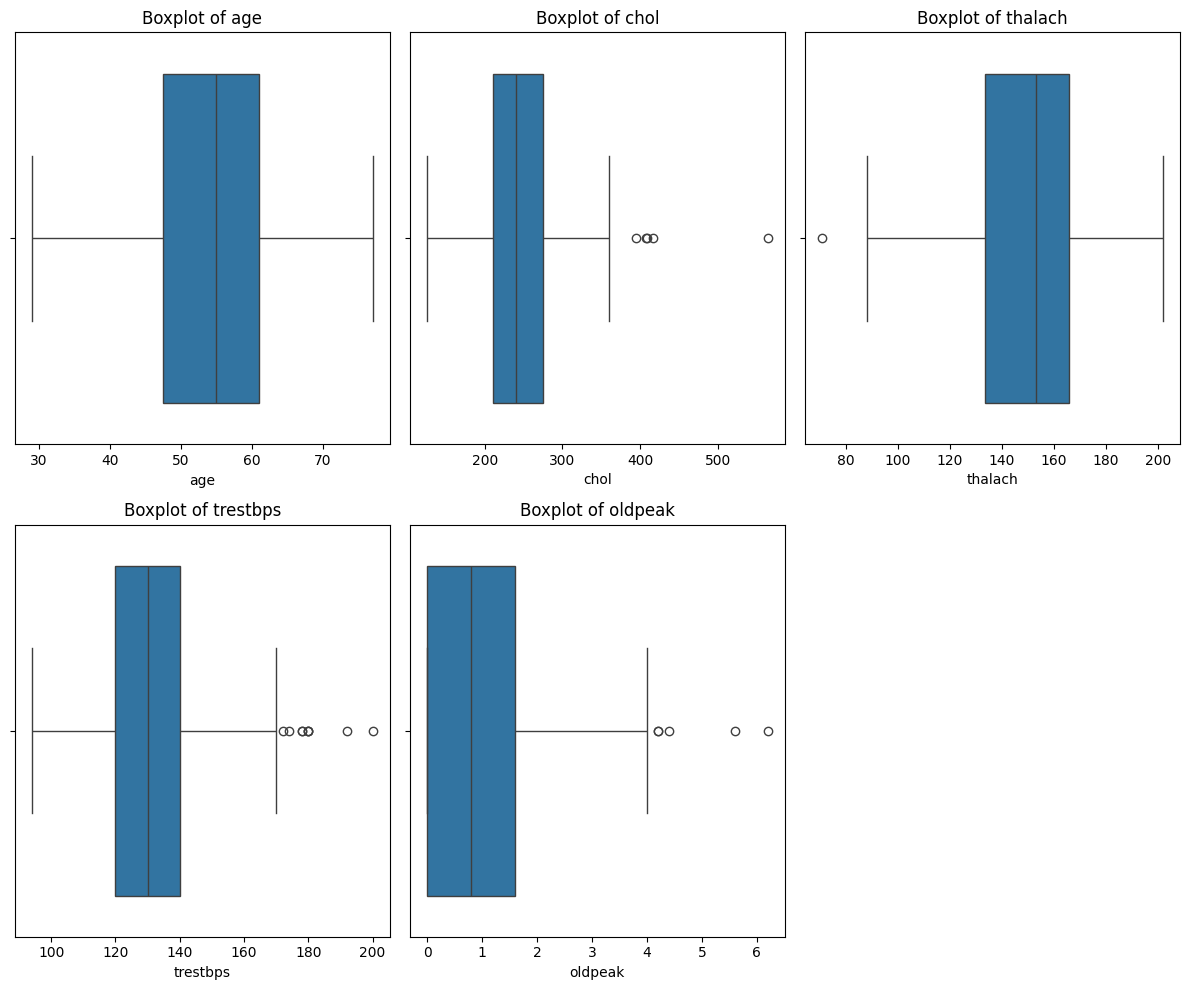

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('heart.csv')
print(df.columns)
df.columns = df.columns.str.strip()

# List of continuous features (adjust based on your actual dataset)
continuous_features = ['age', 'chol', 'thalach', 'trestbps', 'oldpeak']

# Visualizing distributions with histograms
plt.figure(figsize=(12, 10))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Visualizing distributions with boxplots
plt.figure(figsize=(12, 10))
for i, feature in enumerate(continuous_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()


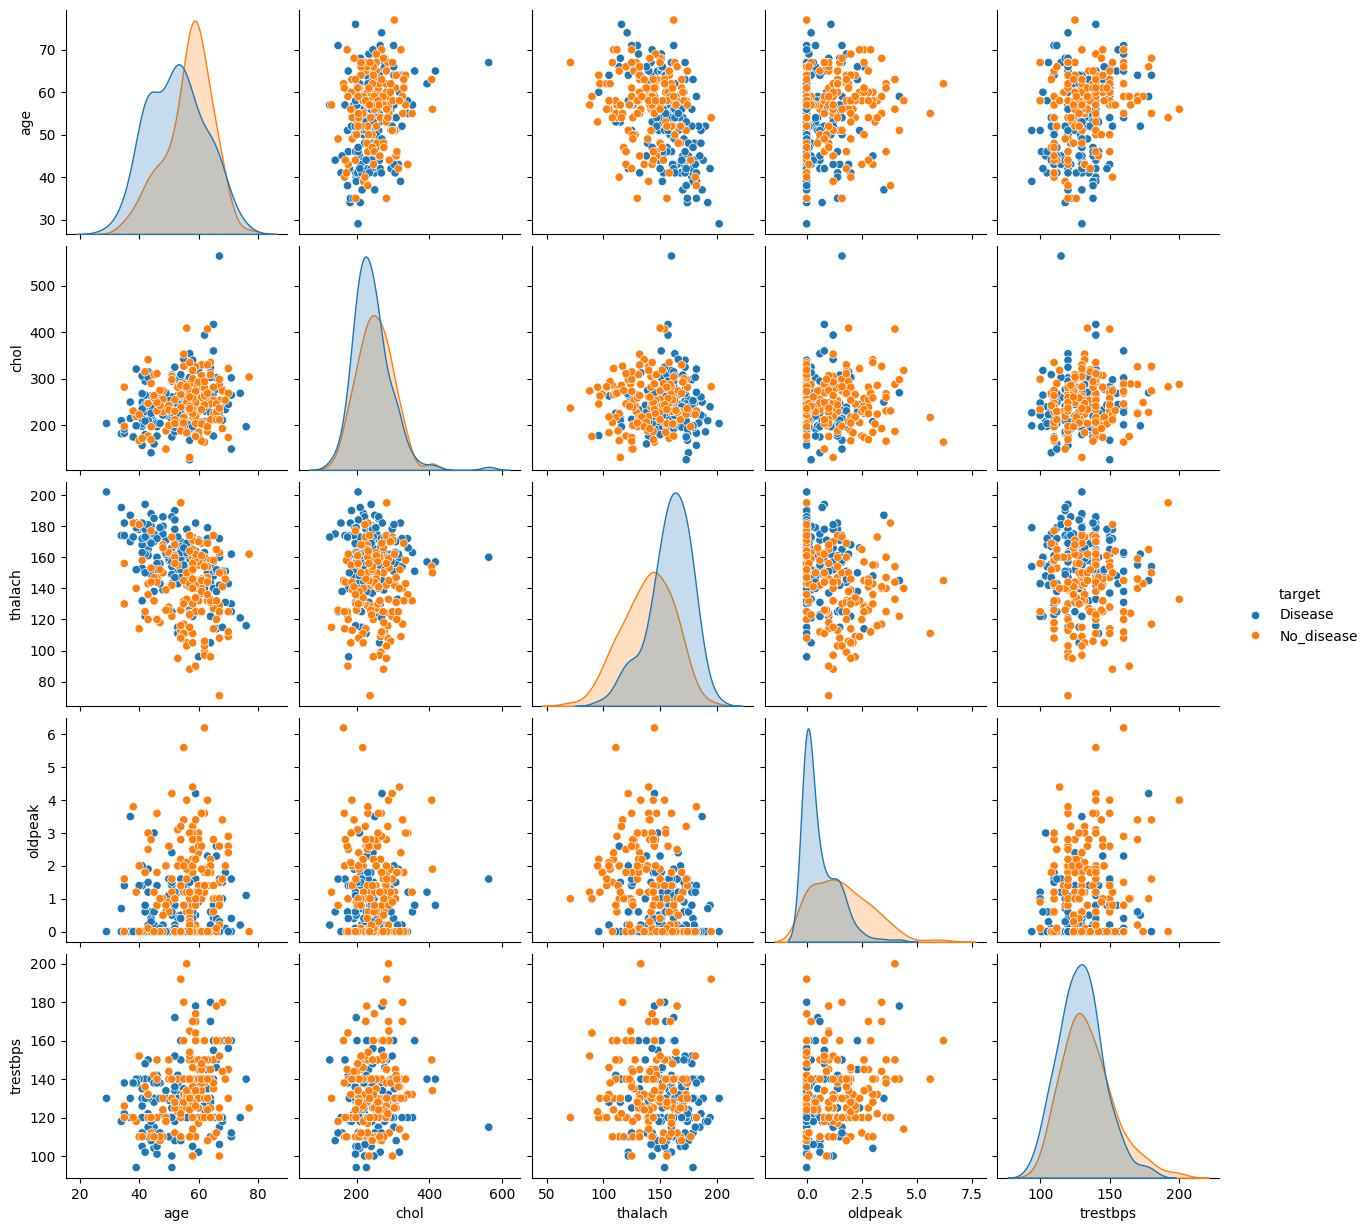

In [14]:
## pair plots can automoaticaly be used to viwe the pairwise relationship between all the  feature that we selected
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']
sns.pairplot(data[continous_features + ['target']], hue='target')

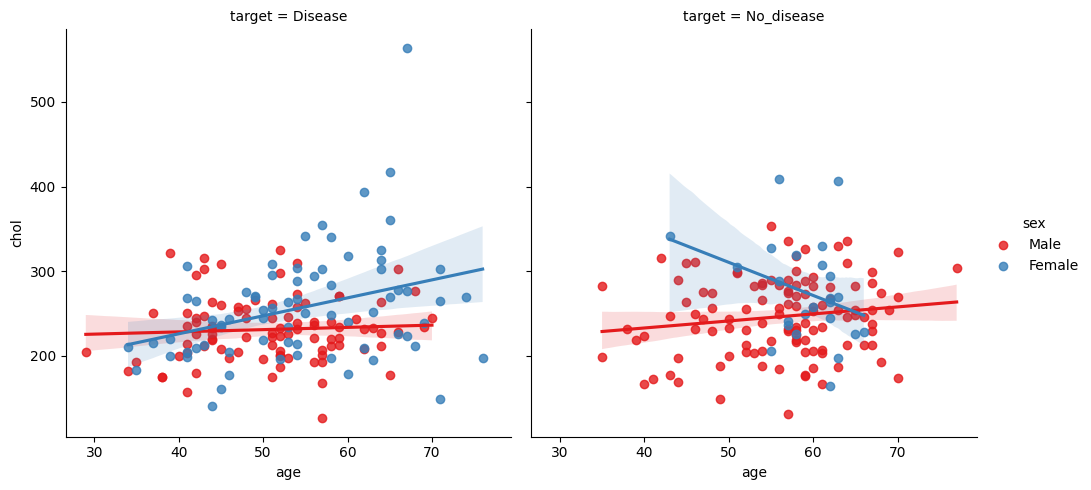

In [15]:
# Now lets try to understand the relationship between age and chol in each of the target based on sex.
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           palette="Set1",
           data=data)
plt.show()

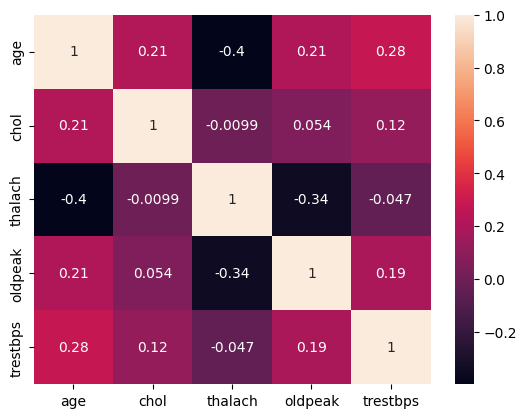

In [16]:
numeric_data = data[continous_features]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True)


plt.show()

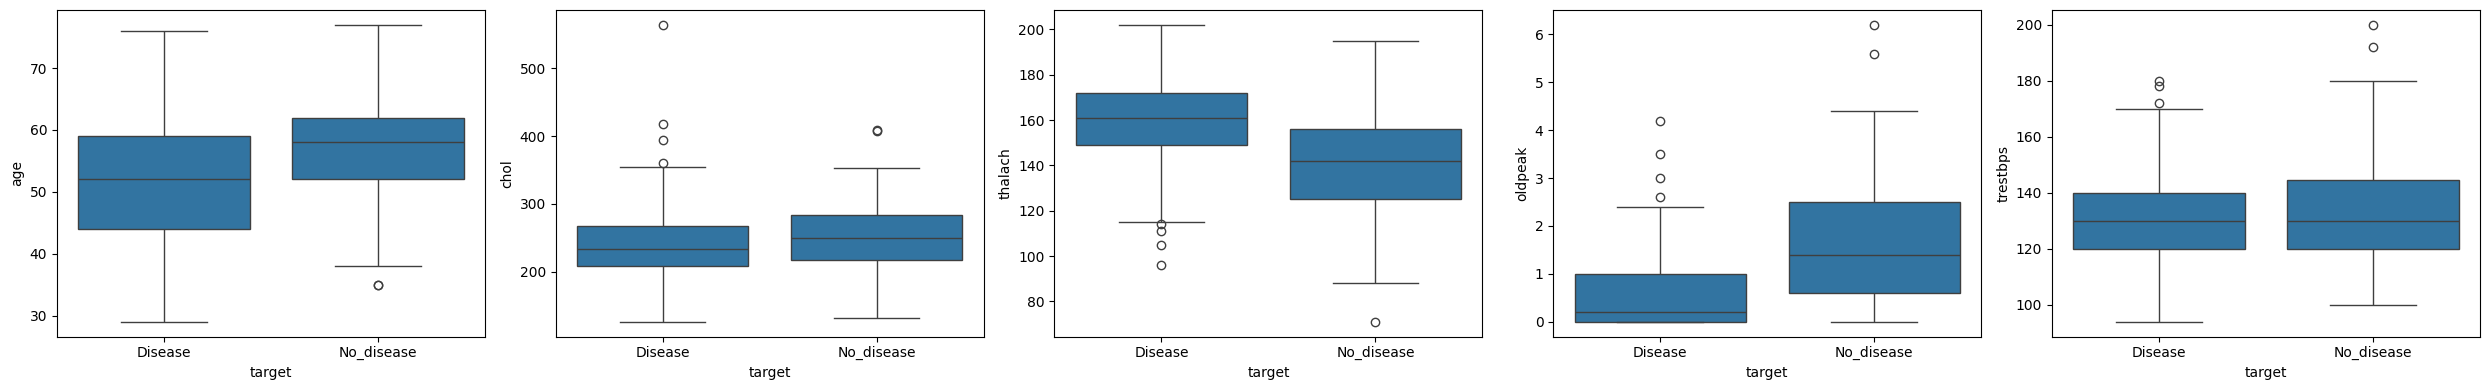

In [17]:
fig, axes = plt.subplots(1, len(continous_features), figsize=(25, 4), sharex=False, sharey=False)

for idx, feature in enumerate(continous_features):
    sns.boxplot(x='target', y=feature, data=data, ax=axes[idx])
plt.tight_layout()
plt.show()

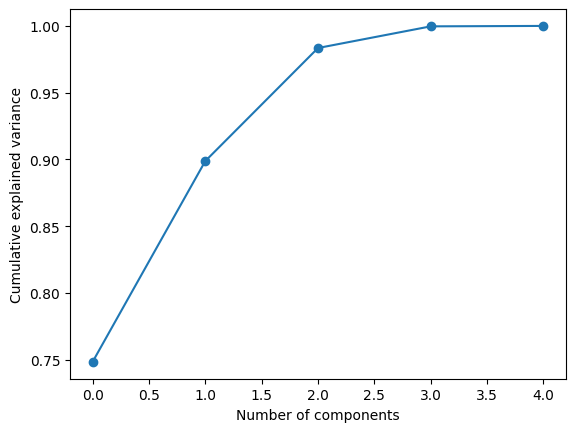

In [18]:
# prompt: plot the cumulative variace of pca for all the possibel pronviopal components
## to do
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
pca.fit(numeric_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


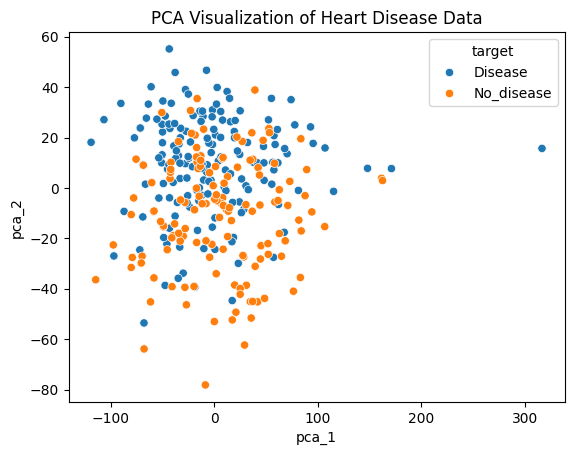

In [19]:
pca = PCA(n_components=2)
pca.fit(numeric_data)
pca_data = pca.transform(numeric_data)

# Create a DataFrame with the principal components and target labels
pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "target": data["target"]
})

# Visualize the PCA results with a scatter plot
sns.scatterplot(x="pca_1", y="pca_2", hue="target", data=pca_df)
plt.title("PCA Visualization of Heart Disease Data")
plt.show()


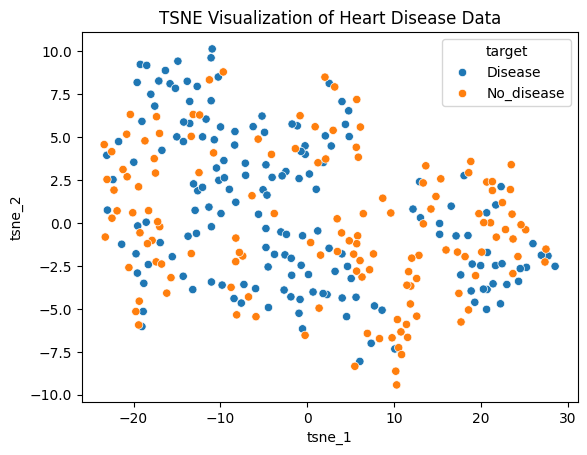

In [20]:
from sklearn.manifold import TSNE

# Initialize and fit the TSNE model
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(numeric_data)

# Create a DataFrame with the TSNE components and target labels
tsne_df = pd.DataFrame({
    "tsne_1": tsne_data[:, 0],
    "tsne_2": tsne_data[:, 1],
    "target": data["target"]
})

# Visualize the TSNE results with a scatter plot
sns.scatterplot(x="tsne_1", y="tsne_2", hue="target", data=tsne_df)
plt.title("TSNE Visualization of Heart Disease Data")
plt.show()


Based on the plots above, answer the following questions:    
1. What is the percentage of Samples with Disease?    
2. what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease?    
3. Can we see a clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots?    
4. What is the optimal number of principal components in our case?    
5. what are the continous features with the highest correation with each other?

Now lets move on to do the same analysis on the starbucks nutrition dataset. this dataset contains the nutrition information of starbucks drinks.

In [35]:
import pandas as pd
df = pd.read_csv('heart.csv')
print(df.head())
print(df.columns)


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [27]:
percentage_with_disease = (df['target'].sum() / len(df)) * 100
print(f"Percentage of Samples with Disease: {percentage_with_disease:.2f}%")


Percentage of Samples with Disease: 54.46%


In [31]:
import pandas as pd
from scipy.stats import ttest_ind

df = pd.read_csv('heart.csv')

df.columns = df.columns.str.strip()

continuous_features = ['age', 'resting_blood_pressure', 'serum_cholestoral',
                       'maximum_heart_rate', 'oldpeak']

p_values = {}

for feature in continuous_features:
    try:
        disease_group = df[df['target'] == 1][feature]
        no_disease_group = df[df['target'] == 0][feature]
        t_stat, p_value = ttest_ind(disease_group, no_disease_group)
        p_values[feature] = p_value
    except KeyError as e:
        print(f"Column {e} not found in the dataset")

sorted_p_values = sorted(p_values.items(), key=lambda x: x[1])

print("Top 3 continuous features with significant differences:")
for feature, p_value in sorted_p_values[:3]:
    print(f"{feature}: p-value = {p_value:.4f}")


Column 'resting_blood_pressure' not found in the dataset
Column 'serum_cholestoral' not found in the dataset
Column 'maximum_heart_rate' not found in the dataset
Top 3 continuous features with significant differences:
oldpeak: p-value = 0.0000
age: p-value = 0.0001


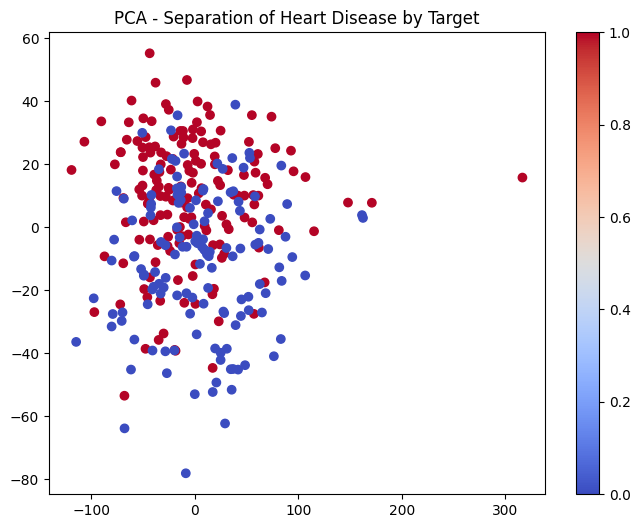

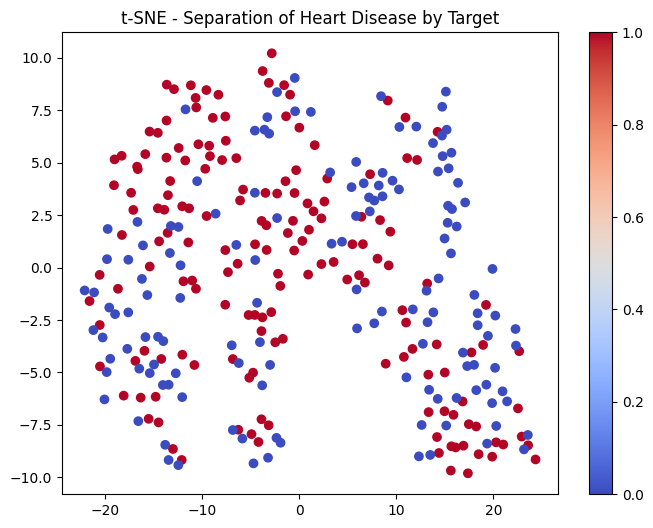

In [32]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_components = pca.fit_transform(df.drop(columns=['target']))

tsne = TSNE(n_components=2)
tsne_components = tsne.fit_transform(df.drop(columns=['target']))

plt.figure(figsize=(8,6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['target'], cmap='coolwarm')
plt.title("PCA - Separation of Heart Disease by Target")
plt.colorbar()
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=df['target'], cmap='coolwarm')
plt.title("t-SNE - Separation of Heart Disease by Target")
plt.colorbar()
plt.show()


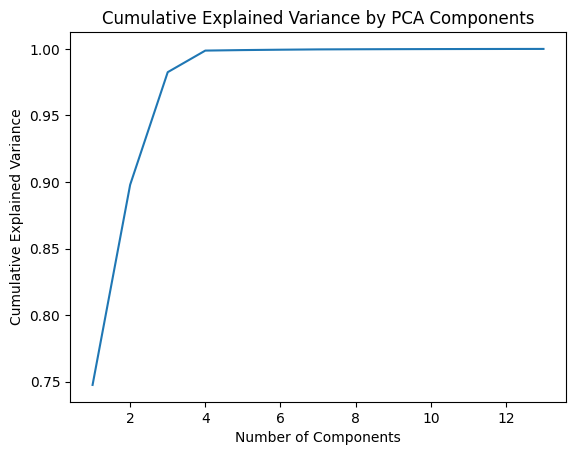

In [33]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

pca = PCA()
pca.fit(df.drop(columns=['target']))

plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.show()


In [34]:
import pandas as pd

df = pd.read_csv('heart.csv')

df.columns = df.columns.str.strip()

print("Column Names in the Dataset: ", df.columns)

continuous_features = ['age', 'resting_blood_pressure', 'serum_cholestoral',
                       'maximum_heart_rate', 'oldpeak']

missing_features = [feature for feature in continuous_features if feature not in df.columns]
if missing_features:
    print(f"Warning: The following features are missing from the dataset: {missing_features}")
else:
    corr_matrix = df[continuous_features].corr()

    corr_matrix_unstacked = corr_matrix.abs().unstack().sort_values(ascending=False)

    corr_matrix_unstacked = corr_matrix_unstacked[corr_matrix_unstacked < 1]

    print("Top continuous features with the highest correlation:")
    print(corr_matrix_unstacked.head(5))


Column Names in the Dataset:  Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [36]:
upload2 = files.upload()

Saving star_nutri_expanded.csv to star_nutri_expanded.csv


In [37]:
data = pd.read_csv("star_nutri_expanded.csv")

In [38]:
data.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


cleaning and filling the missing values in the data

In [39]:
data['Caffeine (mg)'] = data['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)
data['Caffeine (mg)'] = data['Caffeine (mg)'].astype(np.float64)
data['Caffeine (mg)'] = data['Caffeine (mg)'].fillna(data['Caffeine (mg)'].mean())

In [40]:
data['Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [41]:
data['Total Fat (g)'] = data['Total Fat (g)'].replace('3 2', '3.2')

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

In [43]:
# Extract columns with int and float types
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Print the numeric columns
print(numeric_columns)


Index(['Calories', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Caffeine (mg)'],
      dtype='object')


We will be analysing the dataset using the fact that weather the drink comes under the category tea or not

In [44]:
data['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [45]:
data['Tea'] = data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)
data = data.drop('Beverage_category', axis=1)

In [46]:
##  one hot encoding of categorical features in data
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [47]:
data = onehot_encode(
    data,
    columns=['Beverage', 'Beverage_prep'],
    prefixes=['bev', 'bevp']
)

In [48]:

data = data.replace({True: 1, False: 0})


<ipython-input-48-7a01f9f40121>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({True: 1, False: 0})


In [49]:
data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))

<ipython-input-49-4d863302f14a>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))


In [50]:
data.head()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),...,bevp_Grande Nonfat Milk,bevp_Short,bevp_Short Nonfat Milk,bevp_Solo,bevp_Soymilk,bevp_Tall,bevp_Tall Nonfat Milk,bevp_Venti,bevp_Venti Nonfat Milk,bevp_Whole Milk
0,3.0,0.1,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,70.0,0.1,0.1,0.0,5.0,75.0,10.0,0.0,9.0,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 62 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Calories                                                 242 non-null    float64
 1   Total Fat (g)                                            242 non-null    float64
 2   Trans Fat (g)                                            242 non-null    float64
 3   Saturated Fat (g)                                        242 non-null    float64
 4   Sodium (mg)                                              242 non-null    float64
 5   Total Carbohydrates (g)                                  242 non-null    float64
 6   Cholesterol (mg)                                         242 non-null    float64
 7   Dietary Fibre (g)                                        242 non-null    float64
 8   Sugars (g)                    

Columns in the dataset:
Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)',
       'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)'],
      dtype='object')


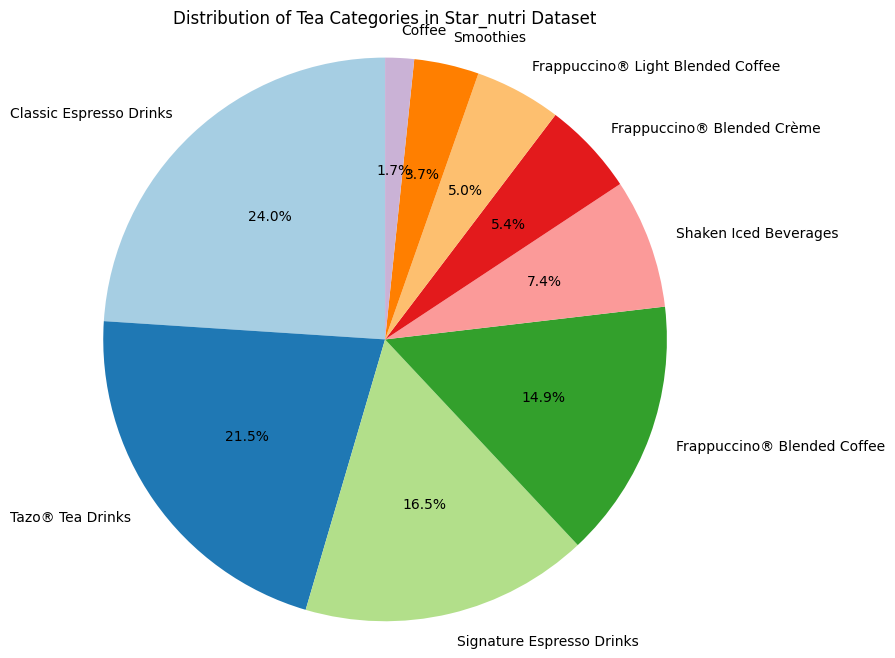

Observations from the Pie Chart:
Beverage_category
Classic Espresso Drinks              58
Tazo® Tea Drinks                     52
Signature Espresso Drinks            40
Frappuccino® Blended Coffee          36
Shaken Iced Beverages                18
Frappuccino® Blended Crème           13
Frappuccino® Light Blended Coffee    12
Smoothies                             9
Coffee                                4
Name: count, dtype: int64


In [52]:
## to do

# Create a pie chart of the 'Tea' column also write your observation form the plot
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('star_nutri_expanded.csv')

print("Columns in the dataset:")
print(df.columns)

if 'Beverage_category' in df.columns:
    tea_data = df['Beverage_category']
    tea_counts = tea_data.value_counts()

    plt.figure(figsize=(8, 8))
    plt.pie(tea_counts, labels=tea_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title('Distribution of Tea Categories in Star_nutri Dataset')
    plt.axis('equal')
    plt.show()

    print("Observations from the Pie Chart:")
    print(tea_counts)

else:
    print("Column 'Beverage_category' not found in the dataset. Please check the column names.")



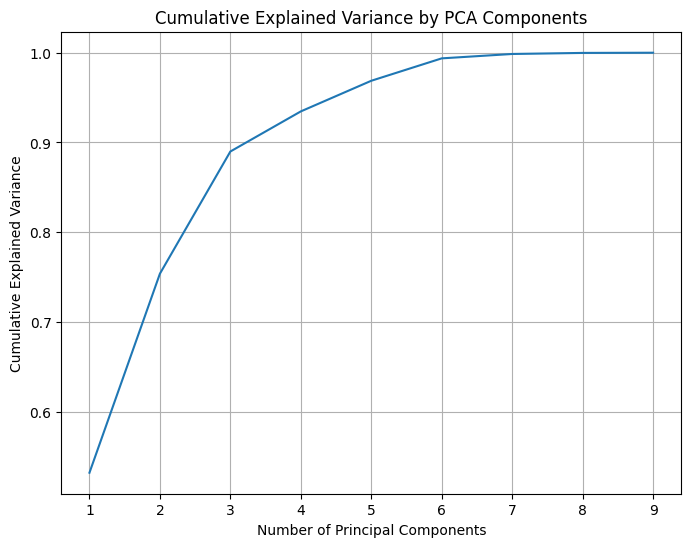

The optimal number of principal components is: 5


In [53]:
## to do
# perform pca on the data and plot the explained variace ratio, what is the optimal number of principal components in this case ?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('star_nutri_expanded.csv')

numeric_columns = df.select_dtypes(include=[np.number]).columns
df_pca = df[numeric_columns]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca)

pca = PCA()
pca.fit(df_scaled)

plt.figure(figsize=(8,6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

explained_variance = np.cumsum(pca.explained_variance_ratio_)
optimal_components = next(i for i, ev in enumerate(explained_variance) if ev > 0.95)

print(f"The optimal number of principal components is: {optimal_components + 1}")


Columns in the dataset:
Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)',
       'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)'],
      dtype='object')


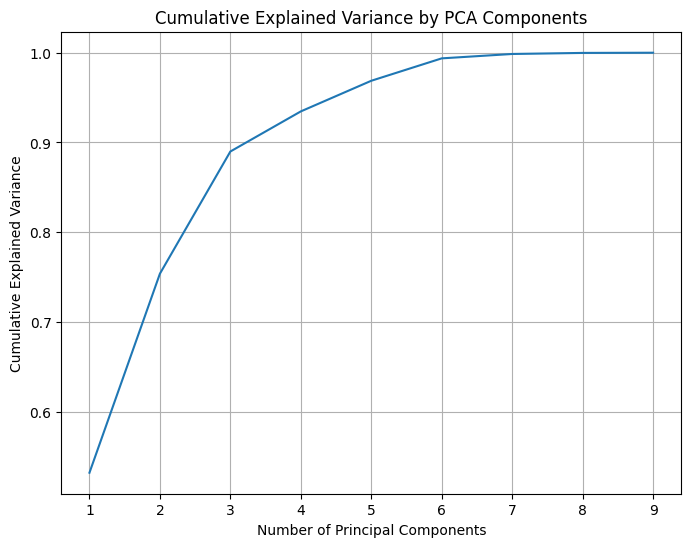

<ipython-input-55-4a18158395db>:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(pca_components[:, 0], pca_components[:, 1], alpha=0.7, cmap='viridis')


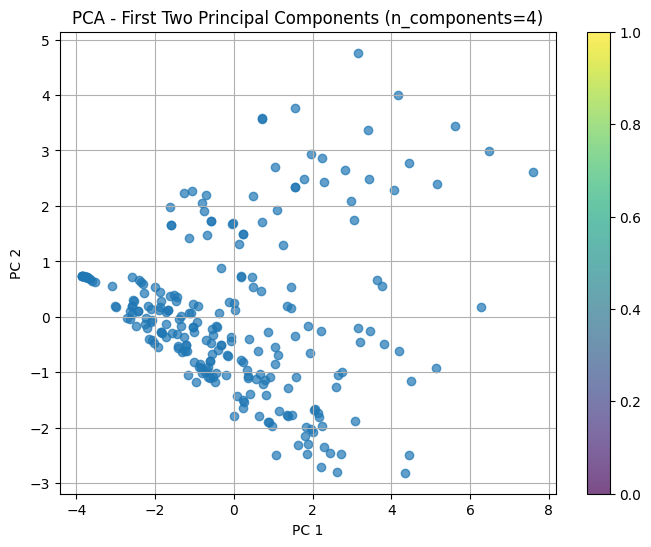

In [55]:
## to do
# visualise the principal components, choose the number of principal components based on the above plot. What is you observation from the plot?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('star_nutri_expanded.csv')

print("Columns in the dataset:")
print(df.columns)

numeric_columns = df.select_dtypes(include=[np.number]).columns
df_pca = df[numeric_columns]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_pca)

pca = PCA()
pca.fit(df_scaled)

plt.figure(figsize=(8,6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

optimal_components = 4

pca = PCA(n_components=optimal_components)
pca_components = pca.fit_transform(df_scaled)

plt.figure(figsize=(8,6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], alpha=0.7, cmap='viridis')
plt.title(f'PCA - First Two Principal Components (n_components={optimal_components})')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.colorbar()
plt.grid(True)
plt.show()


Columns in the dataset:
Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)',
       'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)'],
      dtype='object')


<ipython-input-56-e88e499b53f7>:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_components[:, 0], tsne_components[:, 1], alpha=0.7, cmap='viridis')


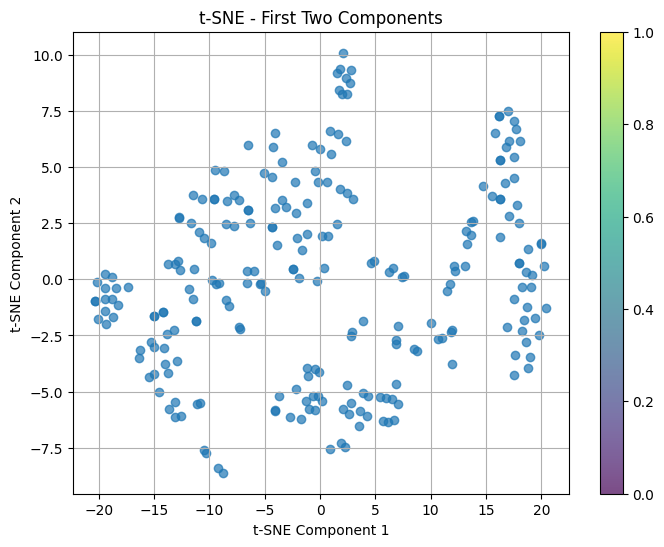

In [56]:
## to do
# plot the first 2 components of tsne, whats you observation from the plot?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('star_nutri_expanded.csv')

print("Columns in the dataset:")
print(df.columns)

numeric_columns = df.select_dtypes(include=[np.number]).columns
df_tsne = df[numeric_columns]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_tsne)

tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(df_scaled)

plt.figure(figsize=(8,6))
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], alpha=0.7, cmap='viridis')
plt.title('t-SNE - First Two Components')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.colorbar()
plt.grid(True)
plt.show()

Columns in the dataset:
Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)',
       'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)'],
      dtype='object')


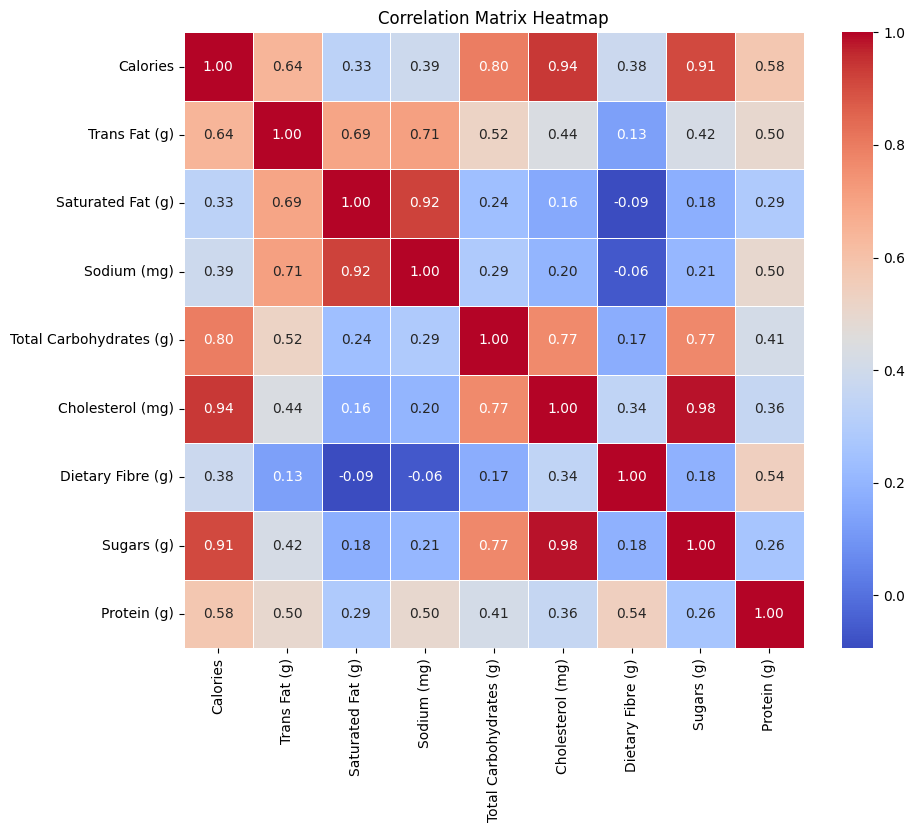

In [57]:
## to do
# create a correlation matrix and plot the heatmap, whats your observation from the heatmap ?
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('star_nutri_expanded.csv')

print("Columns in the dataset:")
print(df.columns)

numeric_columns = df.select_dtypes(include=[np.number]).columns
df_corr = df[numeric_columns]

corr_matrix = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Columns in the dataset:
Index(['Beverage_category', 'Beverage', 'Beverage_prep', 'Calories',
       'Total Fat (g)', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)', 'Vitamin C (% DV)',
       'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)'],
      dtype='object')


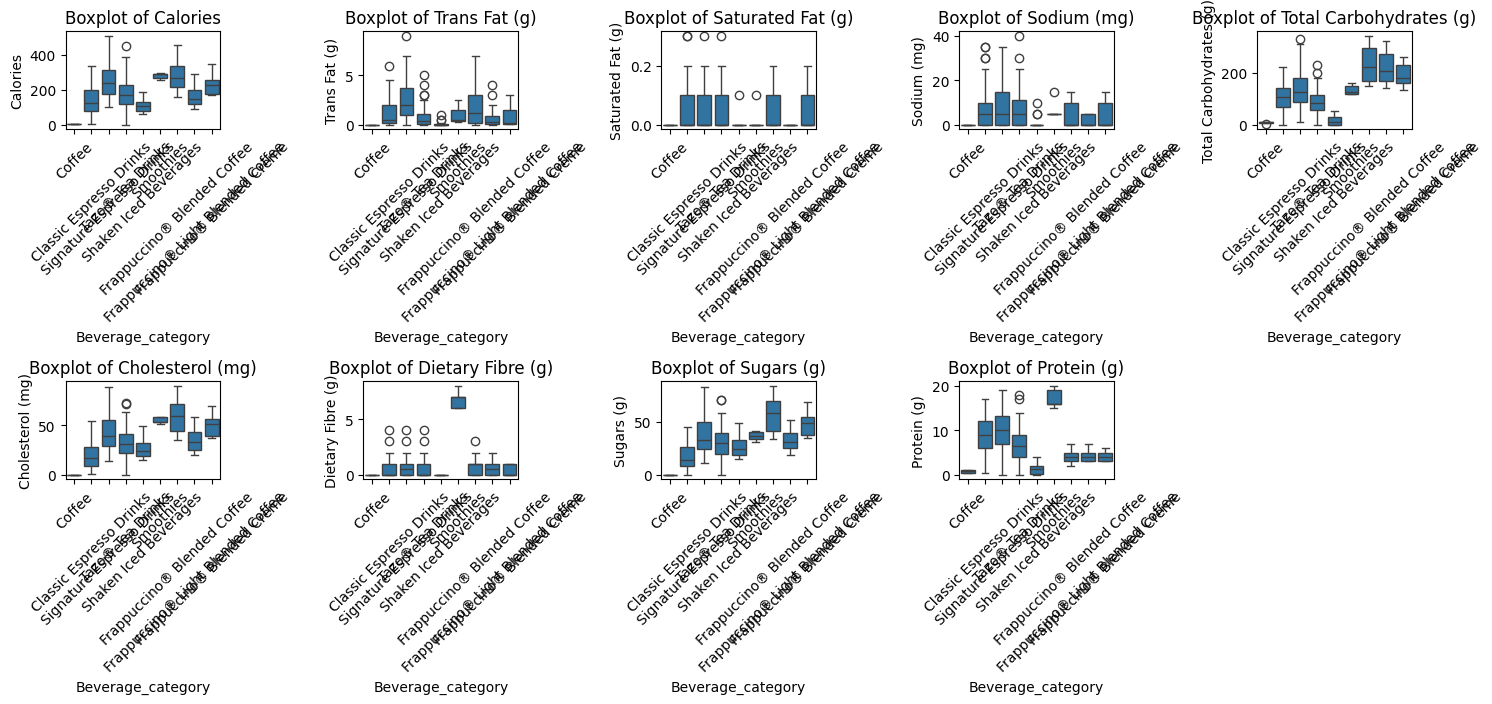

In [58]:
## to do
# make a boxplot of all the numeric columns of the dataset. Which column/columns can be the most potential indicator weather its a tea or a non tea drink?
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('star_nutri_expanded.csv')
print("Columns in the dataset:")
print(df.columns)

numeric_columns = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_columns]

plt.figure(figsize=(15, 12))

for i, column in enumerate(df_numeric.columns, 1):
    plt.subplot(4, 5, i)
    sns.boxplot(x='Beverage_category', y=column, data=df)
    plt.title(f'Boxplot of {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

To enhance the clarity and professionalism of the provided text, consider the following refined version: In the process of conducting a preliminary Exploratory Data Analysis (EDA), we have utilized various techniques to gain insights into the datasets under consideration. It's important to note that our analysis extends beyond the initial visualizations, embracing a multitude of methods to thoroughly understand the data.
Among the array of tools available for EDA, one particularly easy solution is the use of the pandas profiling library. This tool significantly simplifies the process of exploring the fundamental distribution of data within a dataset. By generating detailed profile reports, pandas profiling provides a comprehensive overview of the dataset's characteristics, including but not limited to, the distribution of variables, presence of missing values, and potential correlations between variables.
Furthermore, we are utilizing Google Colab notebooks, the integration of AI tools offers an additional avenue for data visualization and analysis. These tools can automatically generate insightful plots and statistics, further enriching the data exploration process.